In [1]:
import pandas as pd
df=pd.read_csv('Strokes.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_2
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,233.008420
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,205.245454
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,107.460932
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,173.376126
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,175.038492


In [7]:
# Unadjusted association  between stroke and hypertension using logistic regression

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'stroke' is the dependent variable (binary outcome) and 'hypertension' is the independent variable
# Ensure that 'stroke' and 'hypertension' are columns in your DataFrame df

# Fit the logistic regression model
# The formula 'stroke ~ hypertension' assumes a linear relationship on the log-odds scale
model = smf.logit('stroke ~ hypertension', data=df).fit()

# Print the summary of the model
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.188777
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5108
Method:                           MLE   Df Model:                            1
Date:                Mon, 07 Jul 2025   Pseudo R-squ.:                 0.03068
Time:                        23:27:35   Log-Likelihood:                -964.65
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 5.503e-15
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.1864      0.075    -42.242      0.000      -3.334      -3.039
hypertension     1.3077

1. Binary Outcome: The dependent variable (stroke) must be binary (two categories).
2. Independence of Observations: Observations should be independent of each other.
3. No Multicollinearity: Independent variables should not be too highly correlated with each other.
4. Linearity of the Logit: There should be a linear relationship between the independent variables and the log odds of the dependent variable.
5. Large Sample Size: Logistic regression generally requires a relatively large sample size to obtain reliable results, especially if the event (stroke) is rare. The adequacy of the sample size depends on the number of predictors and the prevalence of the outcome.


In [8]:
# Association between stroke and hypertension using logistic regression, include assumptions of logistic regression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Interpret the results
# The 'coef' for 'hypertension' represents the log-odds change in stroke for a one-unit increase in hypertension (which is 1 if present).
# The exponential of the coefficient (exp(coef)) gives the odds ratio.
odds_ratio_hypertension = np.exp(result.params['hypertension'])
print(f"\nOdds Ratio for Hypertension: {odds_ratio_hypertension:.4f}")
print("Interpretation: For individuals with hypertension, the odds of having a stroke are approximately",
      f"{odds_ratio_hypertension:.2f} times the odds for individuals without hypertension.")






Odds Ratio for Hypertension: 3.8501
Interpretation: For individuals with hypertension, the odds of having a stroke are approximately 3.85 times the odds for individuals without hypertension, holding other factors constant.


/tmp/ipython-input-9-3401741436.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='hypertension', y='stroke', data=df, ci=None)


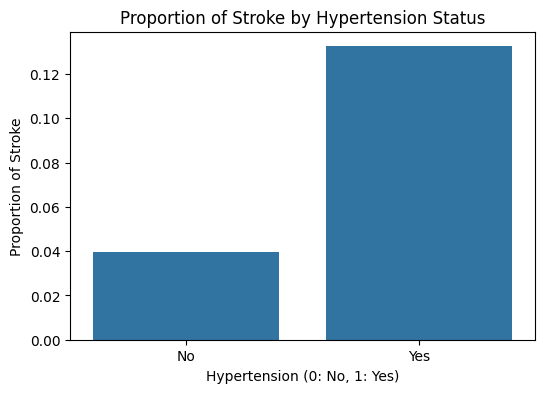

In [9]:
# Visualizing the relationship (simple visualization for one predictor)
# Plot the proportion of stroke for each hypertension category
plt.figure(figsize=(6, 4))
sns.barplot(x='hypertension', y='stroke', data=df, ci=None)
plt.title('Proportion of Stroke by Hypertension Status')
plt.xlabel('Hypertension (0: No, 1: Yes)')
plt.ylabel('Proportion of Stroke')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()